In [3]:
import os

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.plot as ep

Import necessary packages.

In [4]:
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid")

Using seaborn to make a pretty plotting. Set font scale and style.

In [5]:
et.data.get_data("colorado-flood")

'/home/jovyan/earth-analytics/data/colorado-flood/.'

Get data and set working directory

In [6]:
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

Set a working directory

In [7]:
dtm_path_pre = os.path.join("colorado-flood",
                        "spatial",
                        "boulder-leehill-rd",
                        "pre-flood",
                        "lidar",
                        "pre_DTM.tif")

dsm_path_pre = os.path.join("colorado-flood",
                        "spatial",
                        "boulder-leehill-rd",
                        "pre-flood",
                        "lidar",
                        "pre_DSM.tif")

Define relative paths to DTM before flood. and defind a path to DSM files before flood. Telling python where to find the file.

In [8]:
pre_lidar_dtm = rxr.open_rasterio(dtm_path_pre, masked=True).squeeze()
pre_lidar_dsm = rxr.open_rasterio(dsm_path_pre, masked=True).squeeze()

Open DTM and DSM files,and mask no data values by reading in the data and using the masked=True parameter.

In [9]:
# Are the bounds the same?
print("Is the spatial extent the same?",
      pre_lidar_dsm.rio.bounds() == pre_lidar_dtm.rio.bounds())

# Is the resolution the same ??
print("Is the resolution the same?",
      pre_lidar_dsm.rio.resolution() == pre_lidar_dtm.rio.resolution())

Is the spatial extent the same? True
Is the resolution the same? True


Check DSM and DTM cover the same spatial extent and are of the same spatial resolution (pixel size).
the bounds and resolution are the same. This means it is safe to subtract the two rasters 
without significant errors or uncertainty introduced.

In [10]:
# Create canopy height model (CHM)
pre_lidar_chm = pre_lidar_dsm - pre_lidar_dtm
pre_lidar_chm

<xarray.DataArray (y: 2000, x: 4000)>
array([[       nan,        nan,        nan, ..., 0.        , 0.17004395,
        0.96008301],
       [       nan,        nan,        nan, ..., 0.        , 0.09008789,
        1.64001465],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.07995605],
       ...,
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ]])
Coordinates:
    band         int64 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int64 0

Calculate canopy height model. The way to calclulate a CHM befer flood is to sucbtract the DEM from the DSM.

In [11]:
# Define relative paths to DTM and DSM files
dtm_path_post = os.path.join("colorado-flood",
                        "spatial",
                        "boulder-leehill-rd",
                        "post-flood",
                        "lidar",
                        "post_DTM.tif")

dsm_path_post = os.path.join("colorado-flood",
                        "spatial",
                        "boulder-leehill-rd",
                        "post-flood",
                        "lidar",
                        "post_DSM.tif")

# Open DTM and DSM files
post_lidar_dtm = rxr.open_rasterio(dtm_path_post, masked=True).squeeze()
post_lidar_dsm = rxr.open_rasterio(dsm_path_post, masked=True).squeeze()

This step is the same as above. it works with data afer flood.

In [12]:
# Are the bounds the same?
print("Is the spatial extent the same?",
      post_lidar_dsm.rio.bounds() == post_lidar_dtm.rio.bounds())

# Is the resolution the same ??
print("Is the resolution the same?",
      post_lidar_dsm.rio.resolution() == post_lidar_dtm.rio.resolution())

Is the spatial extent the same? True
Is the resolution the same? True


Check DSM and DTM cover the same spatial extent and are of the same spatial resolution

In [13]:
# Create canopy height model (CHM)
post_lidar_chm = post_lidar_dsm - post_lidar_dtm
post_lidar_chm

<xarray.DataArray (y: 2000, x: 4000)>
array([[0.02001953, 0.        , 0.        , ..., 0.        , 0.        ,
        0.98010254],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.40002441],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04003906, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])
Coordinates:
    band         int64 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int64 0

Calculate canopy height model after flood.

In [14]:
# Are the bounds the same?
print("Is the spatial extent the same?",
      post_lidar_chm.rio.bounds() == pre_lidar_chm.rio.bounds())

# Is the resolution the same ??
print("Is the resolution the same?",
      post_lidar_chm.rio.resolution() == pre_lidar_chm.rio.resolution())

Is the spatial extent the same? True
Is the resolution the same? True


Check DSM befor flood and DTM after flood cover the same spatial extent and are of the same spatial resolution

In [15]:
lidar_chm = post_lidar_chm - pre_lidar_chm
lidar_chm

<xarray.DataArray (y: 2000, x: 4000)>
array([[        nan,         nan,         nan, ...,  0.        ,
        -0.17004395,  0.02001953],
       [        nan,         nan,         nan, ...,  0.        ,
        -0.09008789, -0.23999023],
       [        nan,         nan,         nan, ...,  0.        ,
         0.        , -0.07995605],
       ...,
       [        nan,         nan,         nan, ...,  0.        ,
         0.        ,  0.        ],
       [        nan,         nan,         nan, ...,  0.        ,
         0.        ,  0.        ],
       [        nan,         nan,         nan, ...,  0.        ,
         0.        ,  0.        ]])
Coordinates:
    band         int64 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int64 0

Calculate canopy height model before and after the flood.

In [16]:
print('CHM min value:', np.nanmin(lidar_chm))
print('CHM max value:', np.nanmax(lidar_chm))

CHM min value: -23.429931640625
CHM max value: 24.4599609375


Check minimum and maximum value of canopy height model before and after the flood.

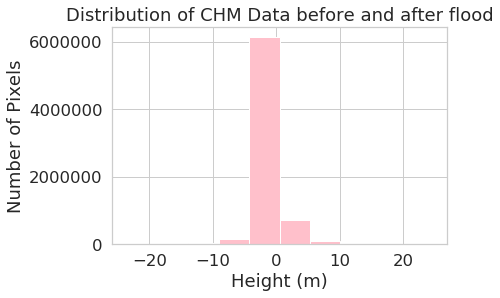

In [17]:
f, ax = plt.subplots()
lidar_chm.plot.hist(color="pink")
ax.set(title="Distribution of CHM Data before and after flood",
       xlabel="Height (m)",
       ylabel="Number of Pixels")
plt.show()

Plot a histogram which quantifies the distribution of values of canopy height model before and after the flood.

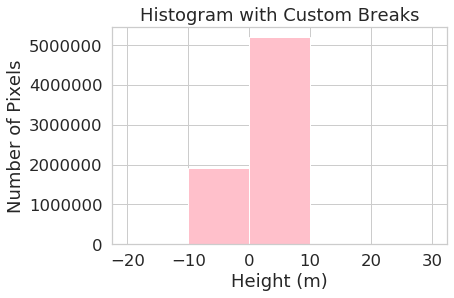

In [18]:
# Histogram with custom breaks
f, ax = plt.subplots()

lidar_chm.plot.hist(
    color='pink',
    bins=[-20, -10, 0, 10, 20, 30])
ax.set(title="Histogram with Custom Breaks",
       xlabel="Height (m)",
       ylabel="Number of Pixels")

plt.show()

Based on min and max values, and histogram above, I customize the histogram with breaks between different bins. 
Bins represents the edges. Positive and negative values are distributed around 0.

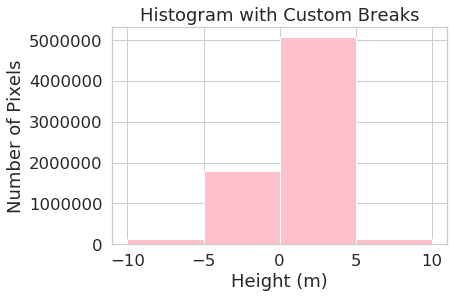

In [19]:
# Histogram with custom breaks
f, ax = plt.subplots()

lidar_chm.plot.hist(
    color='pink',
    bins=[-10, -5, 0, 5, 10])
ax.set(title="Histogram with Custom Breaks",
       xlabel="Height (m)",
       ylabel="Number of Pixels")

plt.show()

I changed a more suitable bin.

In [20]:
lidar_chm.rio.nodata

Check nodata value for the array.

In [21]:
data_min_value = np.nanmin(lidar_chm)
data_max_value = np.nanmax(lidar_chm)
print(data_min_value, data_max_value)

-23.429931640625 24.4599609375


Return the min and max values, ignoring an NA values.

In [22]:
class_bins = [-np.inf, -5, 0, 5, np.inf]
class_bins

[-inf, -5, 0, 5, inf]

Set bins. Any values that are equal to 10 or larger will be assigned a value of 5.
Any values that are < -10 will be assigned a value of 0.

In [23]:
lidar_chm_class = xr.apply_ufunc(np.digitize,
                                     lidar_chm,
                                     class_bins)

Using the xarray library to apply numpy's digitize function. Creates a new object (lidar_chm_class) 
by applying digitize to our former object (lidar_chm) using the class_bins we designated above.

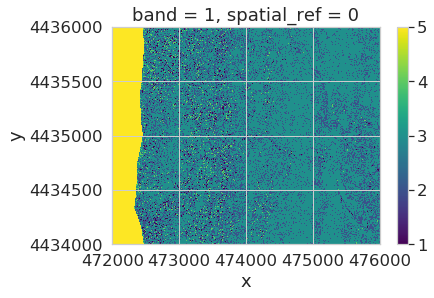

In [24]:
im = lidar_chm_class.plot.imshow()
ax.set_axis_off()

Using the plot.imshow() function to plot our raster as an image.
Raster plot of I classified CHM. The yellow on the left side of the plot. 
Those pixels do not contain data and have been automatically classified as value = 5.

In [25]:
lidar_chm_class_ma = lidar_chm_class.where(lidar_chm_class != 5)
lidar_chm_class_ma

<xarray.DataArray (y: 2000, x: 4000)>
array([[nan, nan, nan, ...,  3.,  2.,  3.],
       [nan, nan, nan, ...,  3.,  2.,  2.],
       [nan, nan, nan, ...,  3.,  3.,  2.],
       ...,
       [nan, nan, nan, ...,  3.,  3.,  3.],
       [nan, nan, nan, ...,  3.,  3.,  3.],
       [nan, nan, nan, ...,  3.,  3.,  3.]])
Coordinates:
    band         int64 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int64 0

Mask out values not equalt to 5.

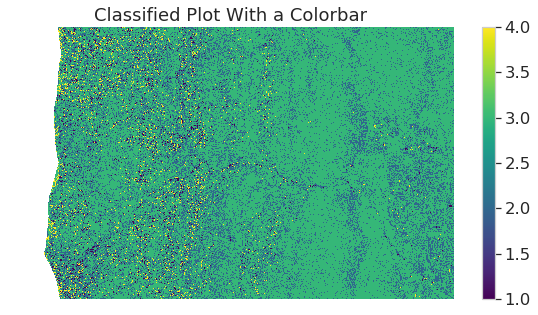

In [26]:
f, ax = plt.subplots(figsize=(10,5))
lidar_chm_class_ma.plot.imshow()
ax.set(title="Classified Plot With a Colorbar")

ax.set_axis_off()
plt.show()

Plot newly classified and masked raster. CHM plot with NA values applied to the data.

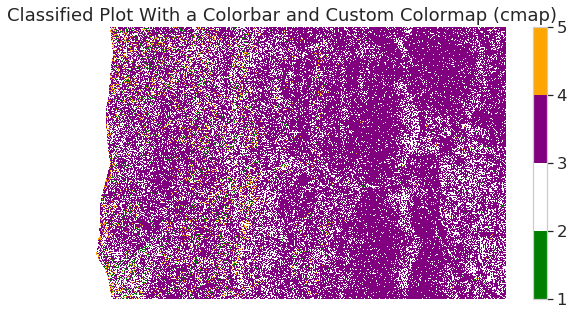

In [29]:
colors = ['green', 'white', 'purple', 'orange']
class_bins = [1, 2, 3, 4, 5]

cmap = ListedColormap(colors)

norm = BoundaryNorm(class_bins, 
                    len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))
lidar_chm_class_ma.plot.imshow(cmap=cmap,
                                   norm=norm)
ax.set(title="Classified Plot With a Colorbar and Custom Colormap (cmap)")
ax.set_axis_off()
plt.show()

Plot data using new colors.

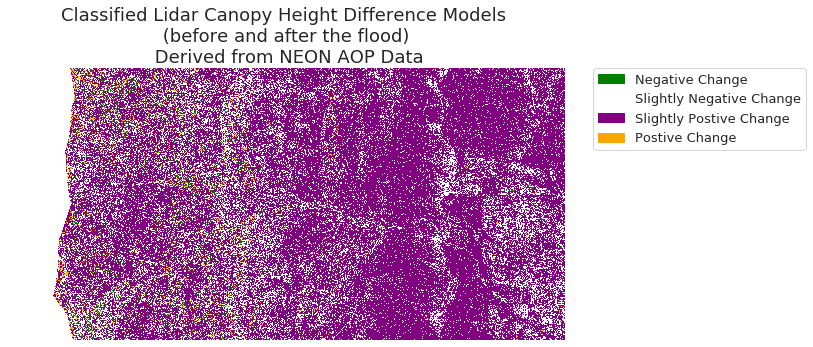

In [30]:
# Create a list of labels to use for your legend
height_class_labels = ["Negative Change",
                       "Slightly Negative Change",
                       "Slightly Postive Change",
                       "Postive Change"]

# Create a colormap from a list of colors
colors = ['green', 'white', 'purple', 'orange']

cmap = ListedColormap(colors)

class_bins = [1, 2, 3, 4, 5]
norm = BoundaryNorm(class_bins,
                    len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))
im = lidar_chm_class_ma.plot.imshow(cmap=cmap,
                                        norm=norm,
                                        # Turn off colorbar
                                        add_colorbar=False)
# Add legend using earthpy
ep.draw_legend(im,
               titles=height_class_labels)
ax.set(title="Classified Lidar Canopy Height Difference Models \n (before and after the flood) \n Derived from NEON AOP Data")
ax.set_axis_off()
plt.show()

Add title and legends. I use different colors to highlight the difference between CHM before and after flood. 
Add a legend that clearly shows what each color in my classified raster represents.